In [1]:
from __future__ import division, unicode_literals, print_function # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure', figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [2]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame, Series # for convenience

# import the packages for reading images and particle tracking
from skimage import io
import trackpy as tp

In [3]:
def crop(img):
    """
    Crop the image to select the region of interest
    """
    x_min = 0
    x_max = -1
    y_min = 0
    y_max = -1
    return img[y_min:y_max,x_min:x_max]

In [4]:
totalParticleNum = 3;

# Set the directory path
glacier_path = 'Z:\Mingxuan Liu'

# The folder where the .tif image stack exists
folder_name = 'dimer-st-zro2-1-6fps'

# The file needed to be read
file_name = folder_name + ' binary crop.tif'

# Join the directory path, folder name, and file name to locate .tif images
tif_path = os.path.join(glacier_path, folder_name, file_name)

frames = io.imread(tif_path)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [10]:
# manually check the binary cropped image
fr = 150
# tracking parameters
params = {
    'diameter': 19,
    'minmass': 3000,
    'invert': False,
    'separation': 9,
}
f = tp.locate(frames[fr], **params);
plt.figure()
image = tp.annotate(f, frames[fr]);

<IPython.core.display.Javascript object>

In [6]:
# process particle tracking for all frames
data = tp.batch(frames, **params);

Frame 357: 2 features


In [7]:
# Link the particles in each frame to their positions in previous two frames
link_data = tp.link(data,15,memory=3)

# Group by 'frame' and count the number of particles in each group
group_sizes = link_data.groupby('frame').size()
# Find frames where only one particle is identified
one_particle_frames = group_sizes[group_sizes == 1]
# Find frames where three particles are identified
three_particle_frames = group_sizes[group_sizes == 3]
# Print the frame numbers
print("Frames below have identified only one particle:")
print(one_particle_frames.index.tolist())
print("Frames below have identified three particles:")
print(three_particle_frames.index.tolist())

Frame 357: 2 trajectories present.
Frames below have identified only one particle:
[]
Frames below have identified three particles:
[]


In [8]:
link_data.to_csv(os.path.join(glacier_path, 'Particle Trajectories', folder_name + ' binary.csv'))

In [ ]:
### The following code snippets are not useful for particle tracking ###

[2.         0.23704053]
[2.         0.03341289]
[2.         0.36376812]


<IPython.core.display.Javascript object>


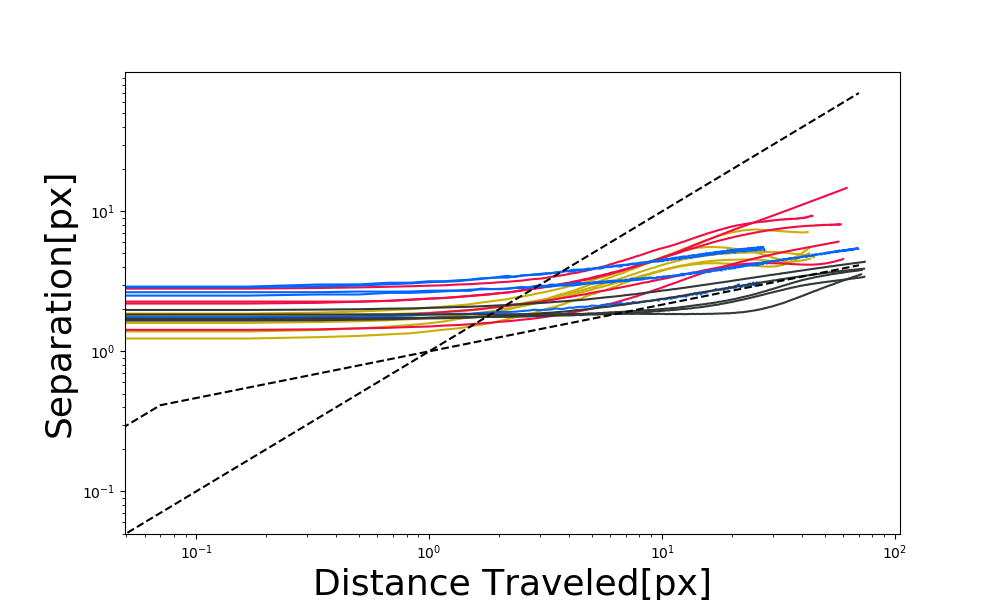

<IPython.core.display.Javascript object>


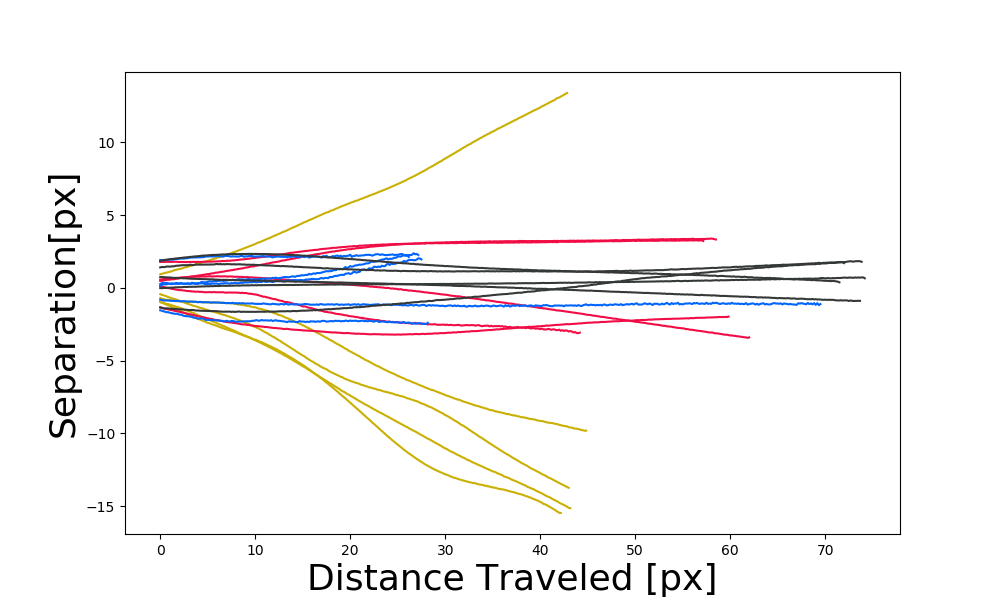

In [5]:
import os
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4

al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
print(al_st)
cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
print(cu_st)
cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
print(cu_pl)

#St+St
st_response=[]
st_label = '0'
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers Binary'):
    st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers Binary',linked_data))
    threshold = 11
    edges = edge_matrix(st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    st_response.append(create_plots(st_data,particles,st_label,1,'#c9b003')) #Brownish Yellow
    
#Cu+St
cu_st_response=[]
cu_st_label = str(cu_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 3
    edges = edge_matrix(cu_st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    cu_st_response.append(create_plots(cu_st_data,particles,cu_st_label,1,'#f10c45')) #Pinkish Red

#Al+St
al_st_response=[]
al_st_label = str(al_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary'):
    threshold = 5
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    edges = edge_matrix(al_st_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    al_st_response.append(create_plots(al_st_data,particles,al_st_label,1,'#0165fc')) #Bright Blue
#print('Al+St',al_st_response,np.mean(al_st_response),np.std(al_st_response))

#Cu+Pl
cu_pl_response=[]
cu_pl_label = str(cu_pl[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 2
    edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    cu_pl_response.append(create_plots(cu_pl_data,particles,cu_pl_label,1,'#343837')) #Charcoal
#print('Cu+Pl',cu_pl_response,np.mean(cu_pl_response),np.std(cu_pl_response))
    
    

    

#print("Cu+St",cu_st_response,np.mean(cu_st_response),np.std(cu_st_response))
#Gets the colors(handles) and labels for each material combination.
#Creates a legend that has only one instance of each combination.


# plt.title('$\mathcal{\kappa}$ = 2', fontsize = 36)
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# #leg.set_title(, prop={'size':14})
# plt.legend(by_label.values(), by_label.keys(),fontsize=20,title='$\chi$',title_fontsize=26)



plt.figure(2)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
t = np.linspace(0,70,1000)
plt.plot(t,np.power(t,1/3),color = 'black',linestyle = 'dashed')
plt.plot(t,t,color = 'black',linestyle = 'dashed')
#plt.plot(t,t,color = 'red',linestyle = 'dashed')
# plt.title('Horizontal $\mathcal{\kappa}$ = 2', fontsize = 36)
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(),fontsize=20,title='$\chi$',title_fontsize=26)
# plt.tick_params(labelsize = 18)
# plt.tight_layout()
#plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\Horizontal Sep Dimer.png')

# plt.figure(3)
# plt.title('Vertical $\mathcal{\kappa}$ = 2', fontsize = 36)
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(),fontsize=20,title='$\chi$',title_fontsize=26, loc = 'upper left')
# plt.tick_params(labelsize = 18)
# plt.tight_layout()
# plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\Vertical Sep Dimer.png')



<IPython.core.display.Javascript object>


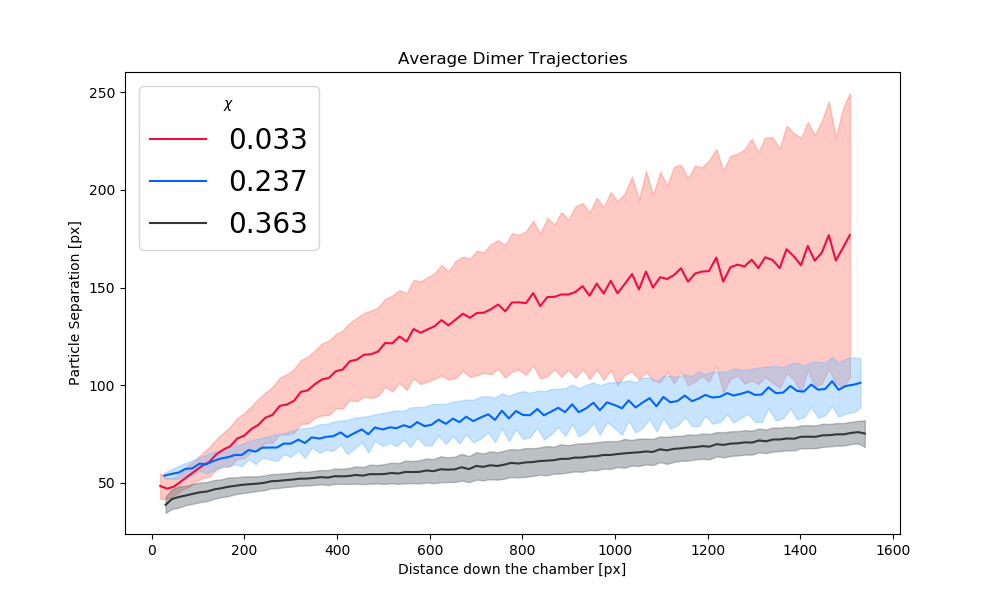

Text(0, 0.5, 'Particle Separation [px]')

In [20]:
import os
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4

al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
al_st_label = str(al_st[1])[:5]

cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
cu_st_label = str(cu_st[1])[:5]

cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
cu_pl_label = str(cu_pl[1])[:5]

st_label = '0'

#Cu+St
cu_st_z = []
cu_st_r = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 3
    edges = edge_matrix(cu_st_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(cu_st_data, particles[0])
    center_p2 = particle_center(cu_st_data, particles[1])
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = (r - r[0])/r[0]
    for i in range(len(z)):
        cu_st_z.append(z[i])
        cu_st_r.append(r[i])

cu_st_bins = 100
cu_st_mean, cu_st_std = smoothdata(cu_st_z, cu_st_r, cu_st_bins)
cu_st_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St Mean Binary.csv')
cu_st_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St Std Binary.csv')

#Al+St
al_st_z = []
al_st_r = []

for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary'):
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 5
    edges = edge_matrix(al_st_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(al_st_data, particles[0])
    center_p2 = particle_center(al_st_data, particles[1])
    
    z = center_p1[1]/2 + center_p2[1]/2
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = (r - r[0])/r[0]
    for i in range(len(z)):
        al_st_z.append(z[i])
        al_st_r.append(r[i])
        
        
al_st_bins = 100
al_st_mean, al_st_std = smoothdata(al_st_z, al_st_r, al_st_bins)
al_st_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Analysis Excel Files\Al+St Mean Binary.csv')
al_st_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Analysis Excel Files\Al+St Std Binary.csv')


#Cu+Pl
cu_pl_z = []
cu_pl_r = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 2
    edges = edge_matrix(cu_pl_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(cu_pl_data, particles[0])
    center_p2 = particle_center(cu_pl_data, particles[1])
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = (r - r[0])/r[0]
    for i in range(len(z)):
        cu_pl_z.append(z[i])
        cu_pl_r.append(r[i])
        
cu_pl_bins = 100
cu_pl_mean, cu_pl_std = smoothdata(cu_pl_z, cu_pl_r, cu_pl_bins)
cu_pl_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Analysis Excel Files\Cu+Pl Mean Binary.csv')
cu_pl_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Analysis Excel Files\Cu+Pl Std Binary.csv')

'''#St+St
st_z = []
st_r = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers'):
    st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers',linked_data))
    threshold = 11
    edges = edge_matrix(st_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(st_data, particles[0])
    center_p2 = particle_center(st_data, particles[1])
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = (r - r[0])/r[0]
    for i in range(len(z)):
        st_z.append(z[i])
        st_r.append(r[i])
st_bins = 100
st_mean, st_std = smoothdata(st_z, st_r, st_bins)'''
#Plotting
plt.figure()

plt.plot(cu_st_mean.x[:-1], cu_st_mean.y[:-1], color = '#f10c45', label = cu_st_label) #Pinkish Red
plt.fill_between(cu_st_mean.x[:-1], cu_st_mean.y[:-1] + cu_st_std.y[:-1], cu_st_mean.y[:-1] - cu_st_std.y[:-1], color = '#ff796c'
                ,alpha = 0.4)#Salmon

#plt.plot(cu_st_mean.x, cu_st_mean.y, color = '#f10c45', label = 'Cu+St') #Pinkish Red
#plt.fill_between(cu_st_mean.x, cu_st_mean.y + cu_st_std.y, cu_st_mean.y - cu_st_std.y, color = '#ff796c'
#                ,alpha = 0.4)#Salmon

plt.plot(al_st_mean.x, al_st_mean.y, color = '#0165fc', label = al_st_label) #Bright Blue
plt.fill_between(al_st_mean.x, al_st_mean.y + al_st_std.y, al_st_mean.y - al_st_std.y, color = '#75bbfd'
                ,alpha = 0.4) #Sky Blue

plt.plot(cu_pl_mean.x, cu_pl_mean.y, color = '#343837', label = cu_pl_label) #Charcoal
plt.fill_between(cu_pl_mean.x, cu_pl_mean.y + cu_pl_std.y, cu_pl_mean.y - cu_pl_std.y, color = '#59656d'
                ,alpha = 0.4 )#Slate Grey

#plt.plot(st_mean.x, st_mean.y, color = '#c9b003', label = st_label) #Brownish Yellow
#plt.fill_between(st_mean.x, st_mean.y + st_std.y, st_mean.y- st_std.y, color = '#fac205'
 #               ,alpha = 0.4)

plt.legend(loc = 'upper left',fontsize = 20,title = '$\chi$')
plt.title('Average Dimer Trajectories')
plt.xlabel('Distance down the chamber [px]')
plt.ylabel('Particle Separation [px]')

#plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\Avg Dimers Total chi legend')

<IPython.core.display.Javascript object>


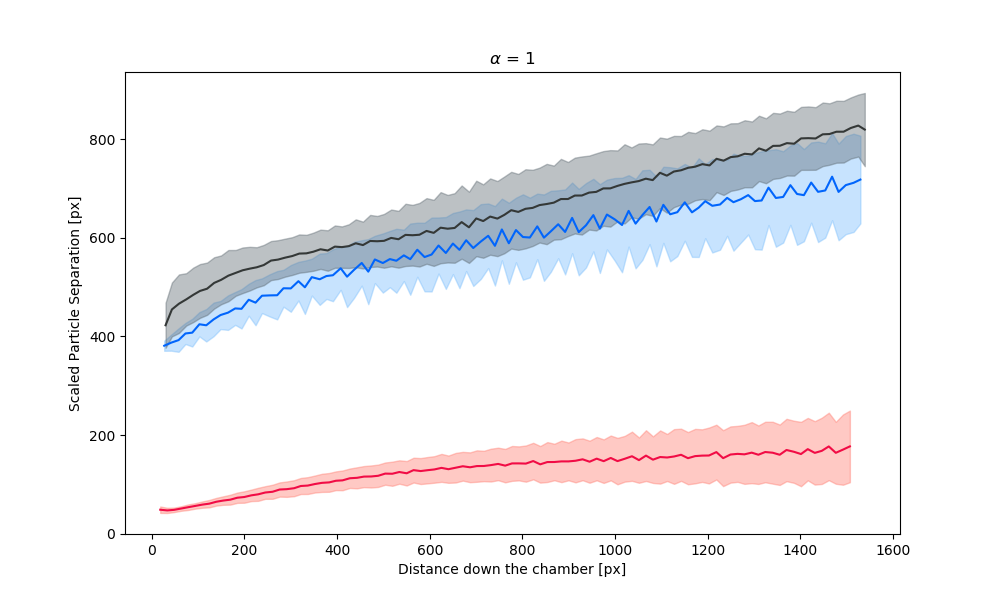

In [22]:
al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])

cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])

cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])

alpha = [1]

for a in alpha:
    cu_st_mean = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St Mean Binary.csv')
    cu_st_std = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St Std Binary.csv')
    
    al_st_mean = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Analysis Excel Files\Al+St Mean Binary.csv')
    al_st_std = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Analysis Excel Files\Al+St Std Binary.csv')
    
    cu_pl_mean = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Analysis Excel Files\Cu+Pl Mean Binary.csv')
    cu_pl_std = pd.read_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Analysis Excel Files\Cu+Pl Std Binary.csv')
    
    #Chi Scaling
    cu_st_s = np.power(cu_st[1]/cu_st[1],a)
    cu_pl_s = np.power(cu_pl[1]/cu_st[1],a)
    al_st_s = np.power(al_st[1]/cu_st[1],a)
    
    cu_st_mean['y'] *= cu_st_s
    cu_st_std['y'] *= cu_st_s
    
    al_st_mean['y'] *= al_st_s
    al_st_std['y'] *= al_st_s
    
    cu_pl_mean['y'] *= cu_pl_s
    cu_pl_std['y'] *= cu_pl_s
    
    #Plotting
    plt.figure()
    
    plt.plot(cu_st_mean['x.1'][:-1], cu_st_mean.y[:-1], color = '#f10c45', label = 'Cu+St') #Pinkish Red
    plt.fill_between(cu_st_mean['x.1'][:-1], cu_st_mean.y[:-1] + cu_st_std.y[:-1], cu_st_mean.y[:-1] - cu_st_std.y[:-1], color = '#ff796c'
                ,alpha = 0.4)#Salmon 
    
    plt.plot(al_st_mean['x.1'], al_st_mean.y, color = '#0165fc', label = 'Al+St') #Bright Blue
    plt.fill_between(al_st_mean['x.1'], al_st_mean.y + al_st_std.y, al_st_mean.y - al_st_std.y, color = '#75bbfd'
               ,alpha = 0.4) #Sky Blue

    plt.plot(cu_pl_mean['x.1'], cu_pl_mean.y, color = '#343837', label = 'Cu+Pl') #Charcoal
    plt.fill_between(cu_pl_mean['x.1'], cu_pl_mean.y + cu_pl_std.y, cu_pl_mean.y - cu_pl_std.y, color = '#59656d'
                ,alpha = 0.4 )#Slate Grey   
    
    plt.title(r'$\alpha$ = '+ str(a))
    plt.xlabel('Distance down the chamber [px]')
    plt.ylabel('Scaled Particle Separation [px]')
    
    savepath = 'Z:\Kavinda Nissanka\Sedimentation\Figures\Dimer Scaling Collapse alpha = ' + str(a)+'.png'
    plt.savefig(savepath)

<IPython.core.display.Javascript object>


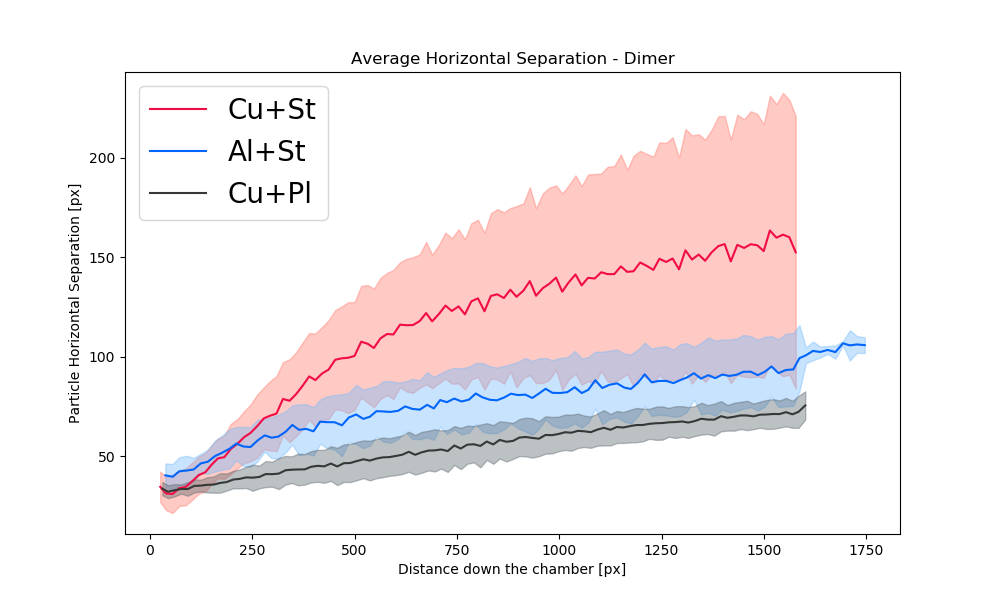

Text(0, 0.5, 'Particle Horizontal Separation [px]')

In [2]:
#
#Horizontal Separation vs. Distance down the chamber
#
#
import os
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4

#Cu+St
cu_st_z = []
cu_st_x = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files',linked_data))
    threshold = 11
    edges = edge_matrix(cu_st_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_st_data, particles[0])
    center_p2 = particle_center(cu_st_data, particles[1])
    
    x = np.abs(center_p1[0] - center_p2[0])
    z = center_p1[1]/2 + center_p2[1]/2
    
    for i in range(0,len(z)):
        cu_st_z.append(z[i])
        cu_st_x.append(x[i])
        
cu_st_bins = 100
cu_st_mean, cu_st_std = smoothdata(cu_st_z, cu_st_x, cu_st_bins)
cu_st_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St MeanX.csv')
cu_st_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+St StdX.csv')

#Al+St
al_st_z = []
al_st_x = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files'):
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files',linked_data))
    threshold = 11
    edges = edge_matrix(al_st_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    center_p1 = particle_center(al_st_data, particles[0])
    center_p2 = particle_center(al_st_data, particles[1])
    
    x = np.abs(center_p1[0] - center_p2[0])
    z = center_p1[1]/2 + center_p2[1]/2
    
    for i in range(0,len(z)):
        al_st_z.append(z[i])
        al_st_x.append(x[i])
        
al_st_bins = 100
al_st_mean, al_st_std = smoothdata(al_st_z, al_st_x, al_st_bins)
al_st_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Al+St MeanX.csv')
al_st_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Al+St StdX.csv')

#Cu+Pl
cu_pl_z = []
cu_pl_x = []
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files',linked_data))
    threshold = 11
    edges = edge_matrix(cu_pl_data, totalParticleNum, threshold)
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_pl_data, particles[0])
    center_p2 = particle_center(cu_pl_data, particles[1])
    
    x = np.abs(center_p1[0] - center_p2[0])
    z = center_p1[1]/2 + center_p2[1]/2

    for i in range(0,len(z)):
        cu_pl_z.append(z[i])
        cu_pl_x.append(x[i])
        
cu_pl_bins = 100

cu_pl_mean, cu_pl_std = smoothdata(cu_pl_z, cu_pl_x, cu_pl_bins)
cu_pl_mean.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+Pl MeanX.csv')
cu_pl_std.to_csv('Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Analysis Excel Files\Cu+Pl StdX.csv')

#Plotting
plt.figure()

plt.plot(cu_st_mean.x[:-1], cu_st_mean.y[:-1], color = '#f10c45', label = 'Cu+St') #Pinkish Red
plt.fill_between(cu_st_mean.x[:-1], cu_st_mean.y[:-1] + cu_st_std.y[:-1], cu_st_mean.y[:-1] - cu_st_std.y[:-1], color = '#ff796c'
                ,alpha = 0.4)#Salmon

#plt.plot(cu_st_mean.x, cu_st_mean.y, color = '#f10c45', label = 'Cu+St') #Pinkish Red
#plt.fill_between(cu_st_mean.x, cu_st_mean.y + cu_st_std.y, cu_st_mean.y - cu_st_std.y, color = '#ff796c'
#                ,alpha = 0.4)#Salmon

plt.plot(al_st_mean.x, al_st_mean.y, color = '#0165fc', label = 'Al+St') #Bright Blue
plt.fill_between(al_st_mean.x, al_st_mean.y + al_st_std.y, al_st_mean.y - al_st_std.y, color = '#75bbfd'
                ,alpha = 0.4) #Sky Blue

plt.plot(cu_pl_mean.x, cu_pl_mean.y, color = '#343837', label = 'Cu+Pl') #Charcoal
plt.fill_between(cu_pl_mean.x, cu_pl_mean.y + cu_pl_std.y, cu_pl_mean.y - cu_pl_std.y, color = '#59656d'
                ,alpha = 0.4 )#Slate Grey

plt.legend(loc = 'upper left',fontsize = 20)
plt.title('Average Horizontal Separation - Dimer')
plt.xlabel('Distance down the chamber [px]')
plt.ylabel('Particle Horizontal Separation [px]')

[3 2 5]
[2.         0.23704053]
[2.         0.03341289]
[2.         0.36376812]


<IPython.core.display.Javascript object>


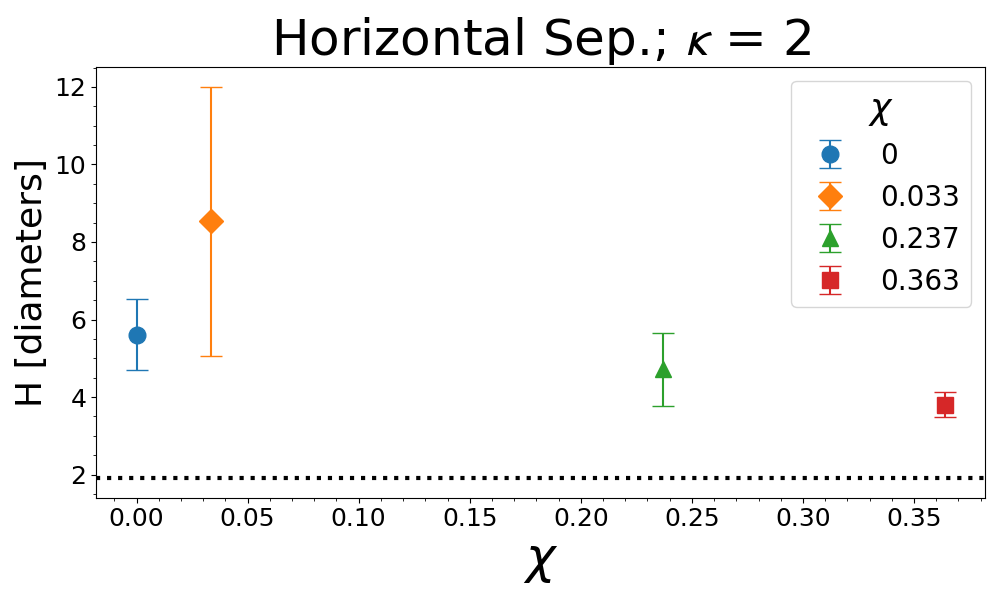

In [9]:
import os
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4

al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
print(al_st)
cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
print(cu_st)
cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
print(cu_pl)

mean_sep = []
#Al+St
al_st_response=[]
al_st_label = str(al_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary'):
    threshold = 5
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    edges = edge_matrix(al_st_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(al_st_data, particles[0])/19
    center_p2 = particle_center(al_st_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    al_st_response.append(deltaX[-1])
    mean_sep.append(deltaX[0])
    
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])
    
#print('Al+St',al_st_response,np.mean(al_st_response),np.std(al_st_response))

#Cu+Pl
cu_pl_response=[]
cu_pl_label = str(cu_pl[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 2
    edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_pl_data, particles[0])/19
    center_p2 = particle_center(cu_pl_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_pl_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    cu_pl_response.append(deltaX[-1])
    mean_sep.append(deltaX[0])
    
    #cu_pl_response.append(r[-1])
    #mean_sep.append(r[0])
    
#print('Cu+Pl',cu_pl_response,np.mean(cu_pl_response),np.std(cu_pl_response))
    
#Cu+St
cu_st_response=[]
cu_st_label = str(cu_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 3
    edges = edge_matrix(cu_st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_st_data, particles[0])/19
    center_p2 = particle_center(cu_st_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    cu_st_response.append(deltaX[-1])
    mean_sep.append(deltaX[0])
    
    #cu_st_response.append(r[-1])
    #mean_sep.append(r[0])
    
    
#St+St
st_response=[]
st_label = '0'
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers'):
    st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers',linked_data))
    threshold = 11
    edges = edge_matrix(st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(st_data, particles[0])/19
    center_p2 = particle_center(st_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    st_response.append(deltaX[-1])
    mean_sep.append(deltaX[0])
    
    #st_response.append(r[-1])
    #mean_sep.append(r[0])
    
init_sep = np.mean(mean_sep)
means = [np.mean(st_response),np.mean(cu_st_response),np.mean(al_st_response),np.mean(cu_pl_response)]
std = [ np.std(st_response), np.std(cu_st_response),np.std(al_st_response),np.std(cu_pl_response)]
chis = [0,cu_st[1], al_st[1], cu_pl[1]]
fmts=['o','D','^','s']
plt.figure()
for i in range(0,4):
    plt.errorbar(chis[i], means[i], yerr = std[i], fmt = fmts[i], capsize = 8, label = str(chis[i])[:5],
                markersize=12)
ax = plt.gca()
#ax.axhline(y=init_sep,linestyle=":",color='k',linewidth=3)    
plt.xlabel('$\kappa$', fontsize = 36)
plt.ylabel('H [diameters]', fontsize = 26)
plt.title('Horizontal Sep.; $\mathcal{\kappa}$ = 2', fontsize = 36)
plt.minorticks_on()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=20,title='$\chi$',title_fontsize=26)
plt.tick_params(labelsize = 18)
plt.tight_layout()
plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\Dimer Avg Horiz Separation vs Chi.png')

[2.         0.23704053]
[2.         0.03341289]
[2.         0.36376812]


<IPython.core.display.Javascript object>


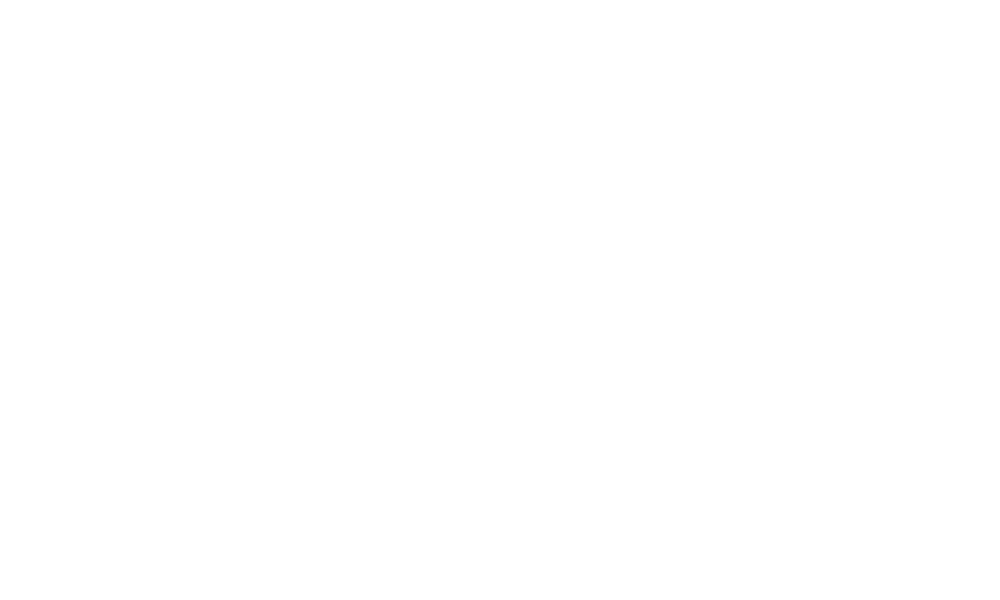

30.205721261477624
351
-2.1142122030830457
0.5366486647679238


<IPython.core.display.Javascript object>


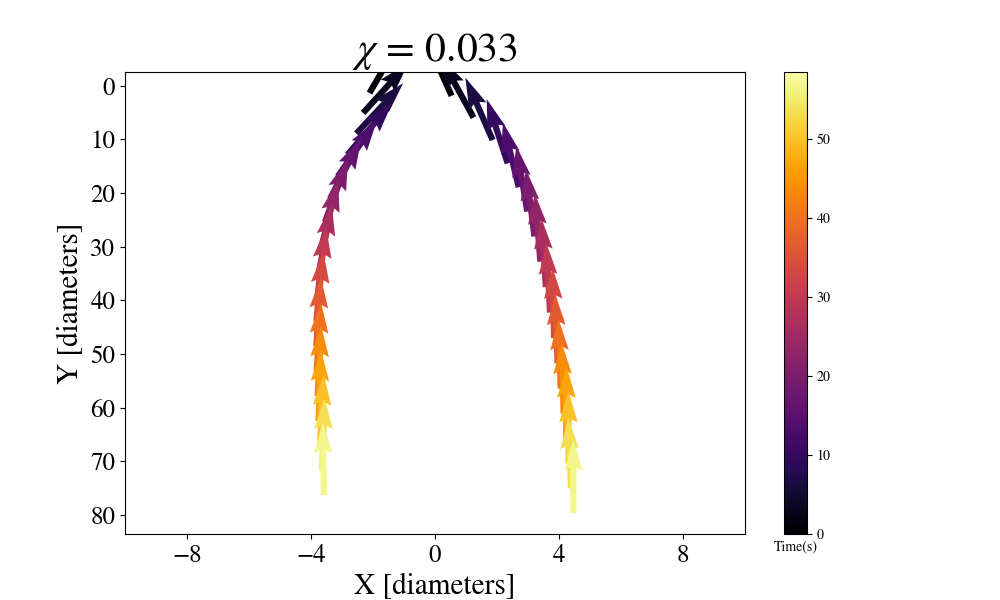

27.4751412463134
258
-4.88404498611758
-3.348358143917391


<IPython.core.display.Javascript object>


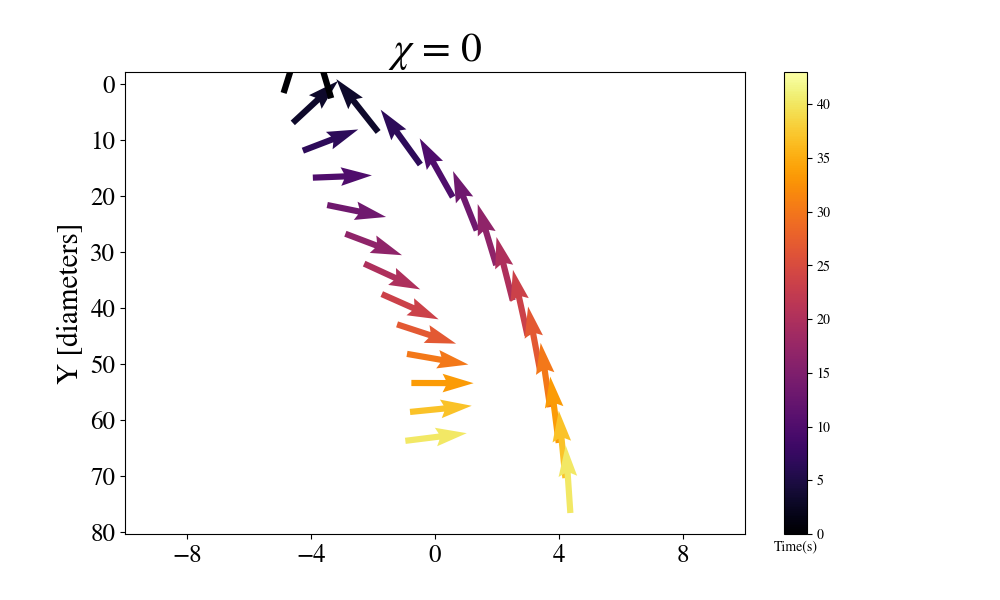

26.762626325375834
446
-1.6313382081106163
0.5290520713372864


<IPython.core.display.Javascript object>


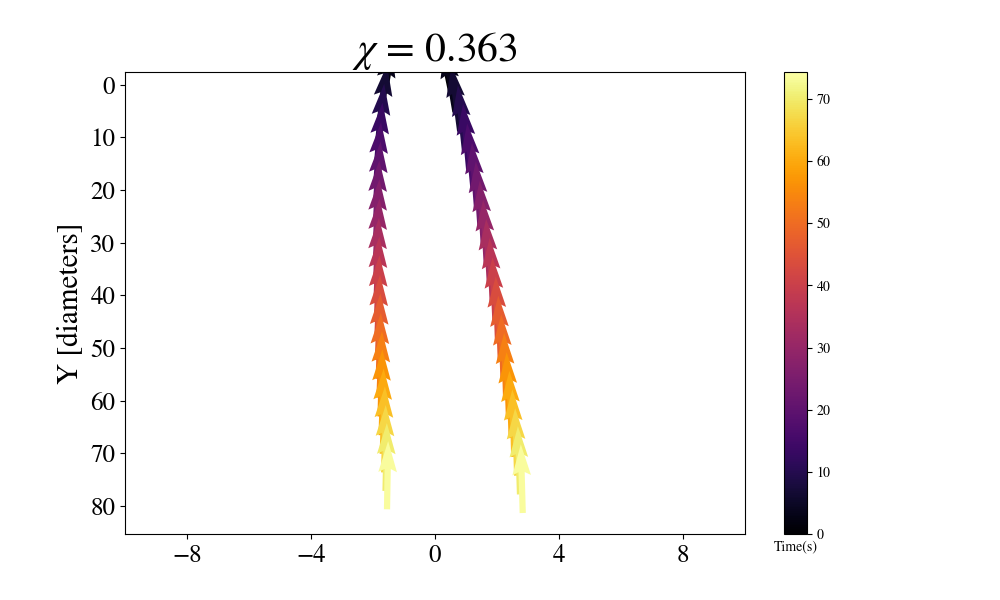

In [19]:
import os
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4

al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
print(al_st)
cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
print(cu_st)
cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
print(cu_pl)

mapname = 'inferno'
cmap= cm.get_cmap(mapname)

plt.figure()
label = 'Cu+St Triplet 7'
cu_st_data = pd.read_csv(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary\Cu+St 10000cst dimer 6 binary.csv')

threshold = 3
edges = edge_matrix(cu_st_data,totalParticleNum,threshold)
particles = particle_creator(edges)
angle_plots(cu_st_data,particles,'$\chi$ = '+str(cu_st[1])[:5],cmap,2)
#plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\Cu+St Triplet 7 Orientation Trajectory line scaled cmap='+mapname)

st_data = pd.read_csv(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers Binary\St+St 10000cst dimer 2.csv')
threshold = 11
edges = edge_matrix(st_data,totalParticleNum,threshold)
particles = particle_creator(edges)
angle_plots(st_data,particles,'$\chi$ = 0',cmap,1)

cu_pl_data = pd.read_csv(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary\Cu+Pl 10000cst dimer 3 binary.csv')
threshold = 2
edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
particles = particle_creator(edges)
angle_plots(cu_pl_data,particles,'$\chi$ = '+str(cu_pl[1])[:5],cmap,3)

plt.show()
#plt.savefig(r'Z:\Kavinda Nissanka\Sedimentation\Figures\Dimer Three Orientation Trajectories.png')

[2.         0.23704053]
[2.         0.03341289]
[2.         0.36293436]
1.3 0.2
2.617901737285439


<IPython.core.display.Javascript object>


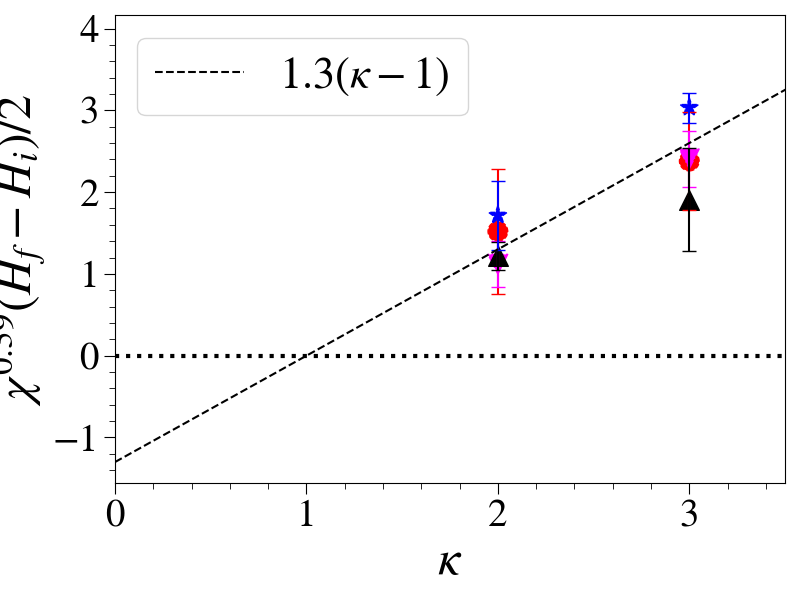

[1.71564816 3.03373114] [0.41987849 0.18305164]


In [16]:
import os
from collections import OrderedDict
from scipy.optimize import curve_fit
%run sedimentation.ipynb
totalParticleNum = 4
mpl.rc('figure', figsize=(8, 6))
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
al = 2.79 #g/cm^3
st = 7.82
cu = 8.94
pl = 1.42
tc = 15.63
scale = 10.7068 #px/mm
al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
print(al_st)
cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
print(cu_st)
cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
print(cu_pl)
tc_st = n_particle(st,tc,2)

al_st_t = n_particle(al,st,3)
cu_st_t = n_particle(st,cu,3)
cu_pl_t = n_particle(pl,cu,3)
tc_cu_t = n_particle(cu,tc,3)
def rspn(h_0,h_f):
    return (h_f - h_0)/2
mean_sep = []

scale_exp = 0.3923370129500829

columns = {'label','kappa','rsp'}
response_df = pd.DataFrame(columns = columns)


#Al+St
al_st_response_D=[]
al_st_chi_D = []
al_st_label = str(al_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary'):
    threshold = 5
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    edges = edge_matrix(al_st_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(al_st_data, particles[0])/scale
    center_p2 = particle_center(al_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = al_st[1]
    
    al_st_response_D.append(rsp*(chi**scale_exp))
    
    al_st_chi_D.append(chi)
    response_df.append({'label':'Al+St','kappa':2,'rsp':rsp}, ignore_index=True)
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])
    
#print('Al+St',al_st_response,np.mean(al_st_response),np.std(al_st_response))

#Cu+Pl
cu_pl_response_D=[]
cu_pl_chi_D = []
cu_pl_label = str(cu_pl[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 2
    edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_pl_data, particles[0])/scale
    center_p2 = particle_center(cu_pl_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_pl_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = cu_pl[1]
    cu_pl_response_D.append(rsp*(chi**scale_exp))
    cu_pl_chi_D.append(chi)
    response_df.append({'label':'Cu+Pl','kappa':2,'rsp':rsp}, ignore_index=True)
    #cu_pl_response.append(r[-1])
    #mean_sep.append(r[0])
    
#print('Cu+Pl',cu_pl_response,np.mean(cu_pl_response),np.std(cu_pl_response))
    
#Cu+St
cu_st_response_D=[]
cu_st_chi_D = []
cu_st_label = str(cu_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
    threshold = 3
    edges = edge_matrix(cu_st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(cu_st_data, particles[0])/scale
    center_p2 = particle_center(cu_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = cu_st[1]
    cu_st_response_D.append(rsp*(chi**scale_exp))
    cu_st_chi_D.append(chi)
    response_df.append({'label':'Cu+St','kappa':2,'rsp':rsp}, ignore_index=True)
    #cu_st_response.append(r[-1])
    #mean_sep.append(r[0])
    
#Tc+St
tc_st_response_D=[]
tc_st_chi_D = []
tc_st_label = str(tc_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files'):
    threshold = 11
    tc_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files',linked_data))
    edges = edge_matrix(tc_st_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(tc_st_data, particles[0])/scale
    center_p2 = particle_center(tc_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = tc_st[1]
    tc_st_response_D.append(rsp*(chi**scale_exp))
    tc_st_chi_D.append(chi)
    response_df.append({'label':'Tc+St','kappa':2,'rsp':rsp}, ignore_index=True)
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])
    
#St+St
st_response_D=[]
st_label = '0'
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers'):
    st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers',linked_data))
    threshold = 11
    edges = edge_matrix(st_data,totalParticleNum,threshold) 
    #print(edges,'\n')
    
    particles = particle_creator(edges)
    center_p1 = particle_center(st_data, particles[0])/19
    center_p2 = particle_center(st_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    st_response_D.append(deltaX[-1])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    
    #st_response.append(r[-1])
    #mean_sep.append(r[0])
    
totalParticleNum = 6
#Al+St
al_st_response_T=[]
al_st_chi_T = []
al_st_label = str(al_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Triplets\Raw Excel Files Binary'):
    threshold = 4
    al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Triplets\Raw Excel Files Binary',linked_data))
    edges = edge_matrix(al_st_data,totalParticleNum,threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(al_st_data, particles[0])/scale
    center_p2 = particle_center(al_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = al_st_t[1]
    al_st_response_T.append(rsp*(chi**scale_exp))
    al_st_chi_T.append(chi)
    response_df.append({'label':'Al+St','kappa':3,'rsp':rsp}, ignore_index=True)
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])
    #al_st_response.append(create_plots(al_st_data,particles,al_st_label,0,'#0165fc')) #Bright Blue
    
#Cu+Pl
cu_pl_response_T=[]
cu_pl_chi_T = []
cu_pl_label = str(cu_pl[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary'):
    cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary',linked_data))
    threshold = 4
    edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(cu_pl_data, particles[0])/scale
    center_p2 = particle_center(cu_pl_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #print(edges,'\n')
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_pl_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = cu_pl_t[1]
    cu_pl_response_T.append(rsp*(chi**scale_exp))
    cu_pl_chi_T.append(chi)
    response_df.append({'label':'Cu+Pl','kappa':3,'rsp':rsp}, ignore_index=True)
    #cu_pl_response.append(r[-1])
    #mean_sep.append(r[0])
    #cu_pl_response.append(create_plots(cu_pl_data,particles,cu_pl_label,0,'#343837')) #Charcoal
    
#Cu+St
cu_st_response_T=[]
cu_st_chi_T = []
cu_st_label = str(cu_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Triplets\Raw Excel Files Binary'):
    cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Triplets\Raw Excel Files Binary',linked_data))
    threshold = 5
    edges = edge_matrix(cu_st_data,totalParticleNum,threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(cu_st_data, particles[0])/scale
    center_p2 = particle_center(cu_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #cu_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = cu_st_t[1]
    cu_st_response_T.append(rsp*(chi**scale_exp))
    cu_st_chi_T.append(chi)
    response_df.append({'label':'Cu+St','kappa':3,'rsp':rsp}, ignore_index=True)
    #cu_st_response.append(r[-1])
    #mean_sep.append(r[0])
    #print(edges,'\n')
    
    
    #cu_st_response.append(create_plots(cu_st_data,particles,cu_st_label,0,'#f10c45')) #Pinkish Red
    
#Tc+Cu
tc_cu_response_T=[]
tc_cu_chi_T = []
tc_cu_label = str(tc_cu_t[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files'):
    threshold = 5
    tc_cu_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files',linked_data))
    edges = edge_matrix(tc_cu_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(tc_cu_data, particles[0])/scale
    center_p2 = particle_center(tc_cu_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = tc_cu_t[1]
    tc_cu_response_T.append(rsp*(chi**scale_exp))
    tc_cu_chi_T.append(chi)
    response_df.append({'label':'Tc+Cu','kappa':3,'rsp':rsp}, ignore_index=True)
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])
st_response_T=[]
st_label = '0'
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Triplet Binary Excel'):
    st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Triplet Binary Excel',linked_data))
    threshold = 5
    edges = edge_matrix(st_data,totalParticleNum,threshold)
    particles = particle_creator(edges)
    
    center_p1 = particle_center(st_data, particles[0])/19
    center_p2 = particle_center(st_data, particles[1])/19
    z = center_p1[1]/2 + center_p2[1]/2
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    
    st_response_T.append(deltaX[-1])
    mean_sep.append(deltaX[0])
    
    #st_response.append(r[-1])
    #mean_sep.append(r[0])
    
    
    #st_response.append(create_plots(st_data,particles,st_label,0,'#c9b003')) #Brownish Yellow



al_st_t = n_particle(al,st,3)
alst_mean = al_st[1]/2+al_st_t[1]/2
alst_range = abs(al_st[1]-al_st_t[1])
cu_st_t = n_particle(st,cu,3)
cust_mean = cu_st[1]/2 + cu_st_t[1]/2
cust_range = abs(cu_st[1]-cu_st_t[1])
cu_pl_t = n_particle(pl,cu,3)
cupl_mean = cu_pl[1]/2 + cu_pl_t[1]/2
cupl_range = abs(cu_pl[1]-cu_pl_t[1])


#mean as = aluminumsteel d = dimer
meanasd = np.mean(al_st_response_D)
stdasd = np.std(al_st_response_D)
meancsd = np.mean(cu_st_response_D)
stdcsd = np.std(cu_st_response_D)
meancpd = np.mean(cu_pl_response_D)
stdcpd = np.std(cu_pl_response_D)
meants = np.mean(tc_st_response_D)
stdts = np.std(tc_st_response_D)
#meanstd = np.mean(st_response_D)
dimers = np.array([meanasd,meancsd,meancpd])#,meanstd])
d_kap = np.full((4),2)
kap_d = np.full((20),2)
meanast = np.mean(al_st_response_T)
stdast = np.std(al_st_response_T)
meancst = np.mean(cu_st_response_T)
stdcst = np.std(cu_st_response_T)
meancpt = np.mean(cu_pl_response_T)
stdcpt = np.std(cu_pl_response_T)
meantc = np.mean(tc_cu_response_T)
stdtc = np.std(tc_cu_response_T)
#meanstt = np.mean(st_response_T)
triplets = np.array([meanast,meancst,meancpt])#,meanstt])
t_kap = np.full((4),3)
kap_t = np.full((20),3)


total_rsp = al_st_response_D + cu_st_response_D + cu_pl_response_D + tc_st_response_D + al_st_response_T + cu_st_response_T + cu_pl_response_T + tc_cu_response_T 
kappas = np.concatenate((kap_d,kap_t))
chis = al_st_chi_D + cu_st_chi_D + cu_pl_chi_D + tc_st_chi_D + al_st_chi_T + cu_st_chi_T + cu_pl_chi_T + tc_cu_chi_T


resp_dict = {'kappa':kappas,'chis':chis, 'response':total_rsp}

response_df = pd.DataFrame(data=resp_dict)
#response_df.to_csv(r'Z:\Kavinda Nissanka\Sedimentation\Figures\2 particle experiments response.csv')
def linear(x,a):
    return a*(x-1)


al_st_dt = np.array([meanasd,meanast])
al_st_dt_std = np.array([stdasd,stdast])
cu_st_dt = np.array([meancsd,meancst])
cu_st_dt_std = np.array([stdcsd,stdcst])
cu_pl_dt = np.array([meancpd,meancpt])
cu_pl_dt_std = np.array([stdcpd,stdcpt])
tc_dt = np.array([meants,meantc])
tc_dt_std = np.array([stdts,stdtc])

resp_dict = {'Al+St':[al_st_dt, al_st_dt_std],'Cu+St':[cu_st_dt, cu_st_dt_std],'Cu+Pl':[cu_pl_dt, cu_pl_dt_std],'Tc':[tc_dt, tc_dt_std]}
resp_table = pd.DataFrame(data = resp_dict)
resp_table.to_csv(r'Z:\Kavinda Nissanka\Sedimentation\Figures\Final separations chi^5e-1.csv')
rsp_total = np.array([meanasd,meanast,meancsd,meancst,meancpd,meancpt,meants,meantc])
rsp_std = np.array([stdasd,stdast,stdcsd,stdcst,stdcpd,stdcpt,stdts,stdtc])
kappas_tot = np.array([2,3,2,3,2,3,2,3])
kappas = np.array([2,3])
fit_point = [1,0]

fit_x = kappas_tot 
fit_y = rsp_total
fit_std = rsp_std
popt,pcov = curve_fit(linear,fit_x,fit_y,p0=[.8],sigma = fit_std)

#a = popt[0]
a = 1.3
#err_a = np.sqrt(pcov[0,0])
err_a = 0.2
print(a,err_a)


chi_sqr = 0
for i in range(len(rsp_total)):
    y = rsp_total[i]
    x = kappas_tot[i]
    y_f = a*(x-1)
    std = rsp_std[i]
    
    chi_sqr += ((y-y_f)**2)/std
print(chi_sqr)

fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0,linestyle=":",color='k',linewidth=3)
print(tc_dt,tc_dt_std)
#plt.ylim([-.5,1])
plt.xlim([0,3.5])
plt.ylabel('$\chi^{'+str(scale_exp)[0:4]+'}(H_{f} - H_{i})/2$',fontsize = 36)
#plt.ylabel('$(H_{f} - H_{i})/2$',fontsize = 36)
plt.xlabel('$\kappa$',fontsize = 36)
plt.scatter(kappas,cu_st_dt,marker = 'o',color = 'red',linestyle = 'dashed',s = 200)#,label = '$\chi$='+str(cust_mean)[:5]+'$\pm$'+str(cust_range)[:5])
plt.errorbar(kappas,cu_st_dt,yerr = cu_st_dt_std,color='red',fmt='none',capsize = 5)
plt.scatter(kappas,al_st_dt,marker = 'v',color = 'magenta',linestyle = 'dashdot',s = 200)# label = '$\chi$='+str(alst_mean)[:5]+'$\pm$'+str(alst_range)[:5],s = 200)
plt.errorbar(kappas,al_st_dt,yerr = al_st_dt_std,color='magenta',fmt='none',capsize = 5)
plt.scatter(kappas,cu_pl_dt,marker = '^',color = 'black',s = 200)# label = '$\chi$='+str(cupl_mean)[:5]+'$\pm$'+str(cupl_range)[:5],s = 200)
plt.errorbar(kappas,cu_pl_dt,yerr = cu_pl_dt_std,color='black',fmt='none',capsize = 5)
plt.scatter(kappas,tc_dt,marker = '*',color = 'blue',linestyle = 'dashed',s = 200)
plt.errorbar(kappas,tc_dt,yerr = tc_dt_std,color='blue',fmt='none',capsize = 5)
kapt = np.linspace(0,4,1000)
plt.plot(kapt,a*kapt - a,color = 'black',linestyle='dashed',label = str(1.3)+'($\kappa - 1$)')
plt.legend(fontsize = 32,loc = 'upper left')
#plt.plot(kapt,gammaF(kapt,cu_st_t[1]))
plt.minorticks_on()
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=8)
plt.tick_params(labelsize = 28)
plt.tight_layout()
#plt.savefig(r'Z:\Kavinda Nissanka\Sedimentation\Figures\response vs kappa.svg')

In [147]:
import os
from scipy.optimize import curve_fit
from collections import OrderedDict
%run sedimentation.ipynb
totalParticleNum = 4
mpl.rc('figure', figsize=(8, 6))
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
al = 2.79 #g/cm^3
st = 7.82
cu = 8.94
pl = 1.42
tc = 15.63
scale = 10.7068 #px/mm
al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])
print(al_st)
cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])
print(cu_st)
cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])
print(cu_pl)
tc_st = n_particle(st,tc,2)

al_st_t = n_particle(al,st,3)
cu_st_t = n_particle(st,cu,3)
cu_pl_t = n_particle(pl,cu,3)
tc_cu_t = n_particle(cu,tc,3)
def rspn(h_0,h_f):
    return (h_f - h_0)/2
mean_sep = []

scale_exp = .48

#Tc+St
tc_st_response_D=[]
tc_st_label = str(tc_st[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files'):
    threshold = 11
    print(linked_data)
    tc_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files',linked_data))
    edges = edge_matrix(tc_st_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(tc_st_data, particles[0])/scale
    center_p2 = particle_center(tc_st_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = tc_st[1]
    tc_st_response_D.append(rsp*(chi**scale_exp))

totalParticleNum = 6
#Tc+Cu
tc_cu_response_T=[]
tc_cu_label = str(tc_cu_t[1])[:5]
for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files'):
    threshold = 5
    tc_cu_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files',linked_data))
    edges = edge_matrix(tc_cu_data,totalParticleNum,threshold)    
    #print(edges,'\n')
    particles = particle_creator(edges)
    
    center_p1 = particle_center(tc_cu_data, particles[0])/scale
    center_p2 = particle_center(tc_cu_data, particles[1])/scale
    z = center_p1[1]/2 + center_p2[1]/2
    
    r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
    if(center_p1[0][0] < center_p2[0][0]):
        deltaX = -center_p1[0] + center_p2[0]
        deltaY = -center_p1[1] + center_p2[1]
    elif(center_p2[0][0] < center_p1[0][0]):
        deltaX = center_p1[0] - center_p2[0]
        deltaY = center_p1[1] - center_p2[1]
    #al_st_response.append(deltaY[-1])
    #mean_sep.append(deltaY[0])
    h_0 = deltaX[0]
    h_f = deltaX[-1]
    rsp = rspn(h_0,h_f)
    mean_sep.append(h_0)
    chi = tc_cu_t[1]
    tc_cu_response_T.append(rsp*(chi**scale_exp))
    #al_st_response.append(r[-1])
    #mean_sep.append(r[0])

[2.         0.23704053]
[2.         0.03341289]
[2.         0.36293436]
10000cst Tc+St 6fps 1 binary.csv
0
3
1
2
10000cst Tc+St 6fps 2 binary.csv
0
2
1
3
10000cst Tc+St 6fps 3 binary.csv
0
2
1
3
10000cst Tc+St 6fps 4 binary.csv
0
1
2
3
10000cst Tc+St 6fps 6 binary.csv
0
3
1
2
0
1
3
2
4
5
0
2
4
1
3
5
0
1
4
2
3
5
0
3
5
1
2
4
0
2
4
1
3
5


<IPython.core.display.Javascript object>


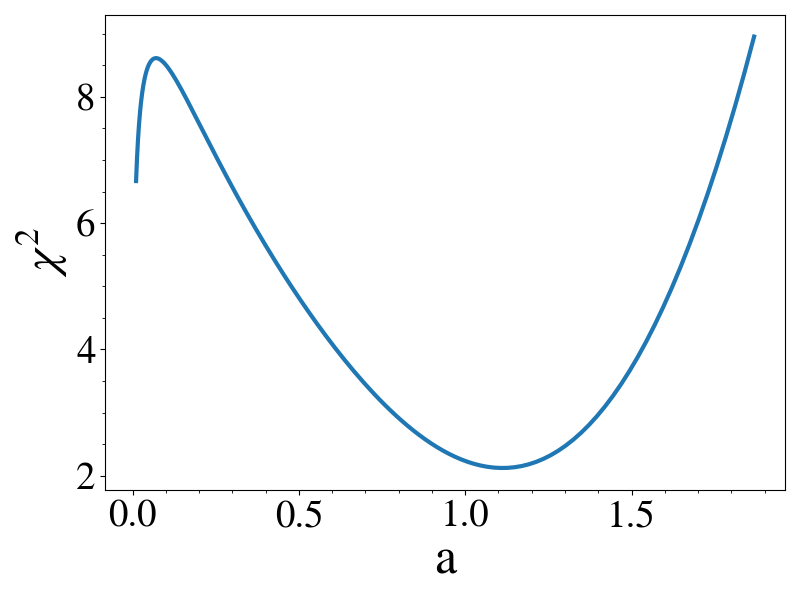

<IPython.core.display.Javascript object>


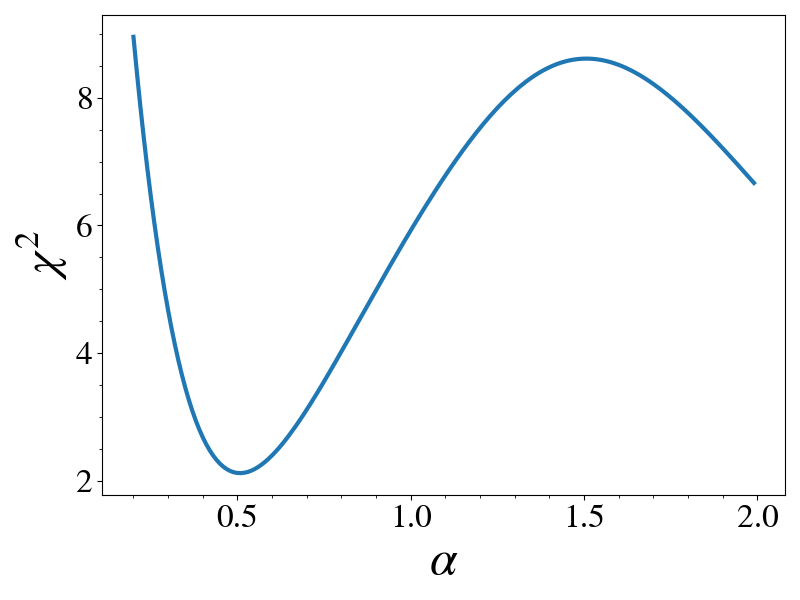

In [268]:
import os
from collections import OrderedDict
from scipy.optimize import curve_fit
%run sedimentation.ipynb
totalParticleNum = 4
mpl.rc('figure', figsize=(8, 6))
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
al = 2.79 #g/cm^3
st = 7.82
cu = 8.94
pl = 1.42
tc = 15.63
scale = 10.7068 #px/mm
al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])

cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])

cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])

tc_st = n_particle(st,tc,2)

al_st_t = n_particle(al,st,3)
cu_st_t = n_particle(st,cu,3)
cu_pl_t = n_particle(pl,cu,3)
tc_cu_t = n_particle(cu,tc,3)

def rspn(h_0,h_f):
    return (h_f - h_0)/2
mean_sep = []

slopes = []
chi_sqrs = []
scale_exps = np.arange(.2,2,.01)
for scale_exp in scale_exps:
    
    #create a data frame with columns kappa and separation
    
    
    totalParticleNum = 4
    #Al+St
    al_st_response_D=[]
    al_st_label = str(al_st[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary'):
        threshold = 5
        al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
        edges = edge_matrix(al_st_data,totalParticleNum,threshold)    
        #print(edges,'\n')
        particles = particle_creator(edges)

        center_p1 = particle_center(al_st_data, particles[0])/scale
        center_p2 = particle_center(al_st_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #al_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])
        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = al_st[1]
        al_st_response_D.append(rsp*(chi**scale_exp))
        #al_st_response.append(r[-1])
        #mean_sep.append(r[0])

    #print('Al+St',al_st_response,np.mean(al_st_response),np.std(al_st_response))

    #Cu+Pl
    cu_pl_response_D=[]
    cu_pl_label = str(cu_pl[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
        cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
        threshold = 2
        edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
        #print(edges,'\n')

        particles = particle_creator(edges)
        center_p1 = particle_center(cu_pl_data, particles[0])/scale
        center_p2 = particle_center(cu_pl_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_pl_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])

        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_pl[1]
        cu_pl_response_D.append(rsp*(chi**scale_exp))
        #cu_pl_response.append(r[-1])
        #mean_sep.append(r[0])

    #print('Cu+Pl',cu_pl_response,np.mean(cu_pl_response),np.std(cu_pl_response))

    #Cu+St
    cu_st_response_D=[]
    cu_st_label = str(cu_st[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary'):
        cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary',linked_data))
        threshold = 3
        edges = edge_matrix(cu_st_data,totalParticleNum,threshold) 
        #print(edges,'\n')

        particles = particle_creator(edges)
        center_p1 = particle_center(cu_st_data, particles[0])/scale
        center_p2 = particle_center(cu_st_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])


        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_st[1]
        cu_st_response_D.append(rsp*(chi**scale_exp))
        #cu_st_response.append(r[-1])
        #mean_sep.append(r[0])

    #Tc+St
    tc_st_response_D=[]
    tc_st_label = str(tc_st[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files'):
        threshold = 11
        tc_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Dimers\Excel Files',linked_data))
        edges = edge_matrix(tc_st_data,totalParticleNum,threshold)    
        #print(edges,'\n')
        particles = particle_creator(edges)

        center_p1 = particle_center(tc_st_data, particles[0])/scale
        center_p2 = particle_center(tc_st_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #al_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])
        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = tc_st[1]
        tc_st_response_D.append(rsp*(chi**scale_exp))
        #al_st_response.append(r[-1])
        #mean_sep.append(r[0])

    #St+St
    st_response_D=[]
    st_label = '0'
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers'):
        st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers',linked_data))
        threshold = 11
        edges = edge_matrix(st_data,totalParticleNum,threshold) 
        #print(edges,'\n')

        particles = particle_creator(edges)
        center_p1 = particle_center(st_data, particles[0])/19
        center_p2 = particle_center(st_data, particles[1])/19
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)

        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])

        st_response_D.append(deltaX[-1])
        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)

        #st_response.append(r[-1])
        #mean_sep.append(r[0])

    totalParticleNum = 6
    #Al+St
    al_st_response_T=[]
    al_st_label = str(al_st[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Triplets\Raw Excel Files Binary'):
        threshold = 4
        al_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Al+St Pairs\Triplets\Raw Excel Files Binary',linked_data))
        edges = edge_matrix(al_st_data,totalParticleNum,threshold)
        particles = particle_creator(edges)

        center_p1 = particle_center(al_st_data, particles[0])/scale
        center_p2 = particle_center(al_st_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2
        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #al_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])


        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = al_st_t[1]
        al_st_response_T.append(rsp*(chi**scale_exp))
        #al_st_response.append(r[-1])
        #mean_sep.append(r[0])
        #al_st_response.append(create_plots(al_st_data,particles,al_st_label,0,'#0165fc')) #Bright Blue

    #Cu+Pl
    cu_pl_response_T=[]
    cu_pl_label = str(cu_pl[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary'):
        cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary',linked_data))
        threshold = 4
        edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
        particles = particle_creator(edges)

        center_p1 = particle_center(cu_pl_data, particles[0])/scale
        center_p2 = particle_center(cu_pl_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2
        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #print(edges,'\n')
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_pl_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])


        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_pl_t[1]
        cu_pl_response_T.append(rsp*(chi**scale_exp))
        #cu_pl_response.append(r[-1])
        #mean_sep.append(r[0])
        #cu_pl_response.append(create_plots(cu_pl_data,particles,cu_pl_label,0,'#343837')) #Charcoal

    #Cu+St
    cu_st_response_T=[]
    cu_st_label = str(cu_st[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Triplets\Raw Excel Files Binary'):
        cu_st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Triplets\Raw Excel Files Binary',linked_data))
        threshold = 5
        edges = edge_matrix(cu_st_data,totalParticleNum,threshold)
        particles = particle_creator(edges)

        center_p1 = particle_center(cu_st_data, particles[0])/scale
        center_p2 = particle_center(cu_st_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2
        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])


        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_st_t[1]
        cu_st_response_T.append(rsp*(chi**scale_exp))
        #cu_st_response.append(r[-1])
        #mean_sep.append(r[0])
        #print(edges,'\n')


        #cu_st_response.append(create_plots(cu_st_data,particles,cu_st_label,0,'#f10c45')) #Pinkish Red

    #Tc+Cu
    tc_cu_response_T=[]
    tc_cu_label = str(tc_cu_t[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files'):
        threshold = 5
        tc_cu_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Tc+St Pairs\Triplets\Excel Files',linked_data))
        edges = edge_matrix(tc_cu_data,totalParticleNum,threshold)    
        #print(edges,'\n')
        particles = particle_creator(edges)

        center_p1 = particle_center(tc_cu_data, particles[0])/scale
        center_p2 = particle_center(tc_cu_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #al_st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])
        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = tc_cu_t[1]
        tc_cu_response_T.append(rsp*(chi**scale_exp))
        #al_st_response.append(r[-1])
        #mean_sep.append(r[0])
    st_response_T=[]
    st_label = '0'
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Triplet Binary Excel'):
        st_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\St+St\Triplet Binary Excel',linked_data))
        threshold = 5
        edges = edge_matrix(st_data,totalParticleNum,threshold)
        particles = particle_creator(edges)

        center_p1 = particle_center(st_data, particles[0])/19
        center_p2 = particle_center(st_data, particles[1])/19
        z = center_p1[1]/2 + center_p2[1]/2
        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #st_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])

        st_response_T.append(deltaX[-1])
        mean_sep.append(deltaX[0])

        #st_response.append(r[-1])
        #mean_sep.append(r[0])


        #st_response.append(create_plots(st_data,particles,st_label,0,'#c9b003')) #Brownish Yellow

    al_st_t = n_particle(al,st,3)
    alst_mean = al_st[1]/2+al_st_t[1]/2
    alst_range = abs(al_st[1]-al_st_t[1])
    cu_st_t = n_particle(st,cu,3)
    cust_mean = cu_st[1]/2 + cu_st_t[1]/2
    cust_range = abs(cu_st[1]-cu_st_t[1])
    cu_pl_t = n_particle(pl,cu,3)
    cupl_mean = cu_pl[1]/2 + cu_pl_t[1]/2
    cupl_range = abs(cu_pl[1]-cu_pl_t[1])
    
    
    #mean as = aluminumsteel d = dimer
    meanasd = np.mean(al_st_response_D)
    stdasd = np.std(al_st_response_D)
    meancsd = np.mean(cu_st_response_D)
    stdcsd = np.std(cu_st_response_D)
    meancpd = np.mean(cu_pl_response_D)
    stdcpd = np.std(cu_pl_response_D)
    meants = np.mean(tc_st_response_D)
    stdts = np.std(tc_st_response_D)
    #meanstd = np.mean(st_response_D)
    dimers = np.array([meanasd,meancsd,meancpd])#,meanstd])
    d_kap = np.full((4),2)
    meanast = np.mean(al_st_response_T)
    stdast = np.std(al_st_response_T)
    meancst = np.mean(cu_st_response_T)
    stdcst = np.std(cu_st_response_T)
    meancpt = np.mean(cu_pl_response_T)
    stdcpt = np.std(cu_pl_response_T)
    meantc = np.mean(tc_cu_response_T)
    stdtc = np.std(tc_cu_response_T)
    #meanstt = np.mean(st_response_T)
    triplets = np.array([meanast,meancst,meancpt])#,meanstt])
    t_kap = np.full((4),3)

    def linear(x,a):
        return a*(x-1)


    al_st_dt = np.array([meanasd,meanast])
    al_st_dt_std = np.array([stdasd,stdast])
    cu_st_dt = np.array([meancsd,meancst])
    cu_st_dt_std = np.array([stdcsd,stdcst])
    cu_pl_dt = np.array([meancpd,meancpt])
    cu_pl_dt_std = np.array([stdcpd,stdcpt])
    tc_dt = np.array([meants,meantc])
    tc_dt_std = np.array([stdts,stdtc])

    rsp_total = np.array([meanasd,meanast,meancsd,meancst,meancpd,meancpt,meants,meantc])
    rsp_std = np.array([stdasd,stdast,stdcsd,stdcst,stdcpd,stdcpt,stdts,stdtc])
    kappas_tot = np.array([2,3,2,3,2,3,2,3])
    kappas = np.array([2,3])
    fit_point = [1,0]

    fit_x = kappas_tot 
    fit_y = rsp_total
    fit_std = rsp_std
    popt,pcov = curve_fit(linear,fit_x,fit_y,p0=[.8],sigma = fit_std)

    a = popt[0]
    err_a = np.sqrt(pcov[0,0])
    slopes.append(a)
    chi_sqr = 0
    for i in range(len(rsp_total)):
        y = rsp_total[i]
        x = kappas_tot[i]
        y_f = a*(x-1)
        std = rsp_std[i]

        chi_sqr += ((y-y_f)**2)/std
    chi_sqrs.append(chi_sqr)
    
# min_index = chi_sqrs.index(min(chi_sqrs))
# confidence95 = chi_sqrs[min_index] + 5.991
# chi_array = np.array(chi_sqrs)
# diff_array1 = np.abs(chi_array[0:min_index] - confidence95)
# diff_array2 = np.abs(chi_array[min_index:-1] - confidence95)
# index1 = diff_array1.argmin()
# index2 = diff_array2.argmin()
# print(confidence95)
# print(chi_sqrs[min_index],slopes[min_index],scale_exps[min_index])
# print([scale_exps[index1],chi_sqrs[index1]])
# print([scale_exps[index2],chi_sqrs[index2]])
fs = 36
plt.figure(1)
plt.minorticks_on()
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=8)
plt.tick_params(labelsize = 28)
plt.plot(slopes,chi_sqrs,linewidth = 3)
plt.xlabel('a',fontsize=fs)
plt.ylabel('$\chi^{2}$',fontsize=fs)
plt.tight_layout()
#plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\chisqr vs slopes.png')
plt.figure(2)
plt.minorticks_on()
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=8)
plt.tick_params(labelsize = 24)
plt.plot(scale_exps,chi_sqrs,linewidth = 3)
plt.xlabel(r'$\alpha $',fontsize=fs)
plt.ylabel('$\chi^{2}$',fontsize=fs)
plt.tight_layout()
#plt.savefig('Z:\Kavinda Nissanka\Sedimentation\Figures\chisqr vs alphas.png')

In [232]:
import os
from collections import OrderedDict
from scipy.optimize import curve_fit
%run sedimentation.ipynb
totalParticleNum = 4
mpl.rc('figure', figsize=(8, 6))
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
al = 2.79 #g/cm^3
st = 7.82
cu = 8.94
pl = 1.42
tc = 15.63
scale = 10.7068 #px/mm
al_st = n_particle(al,st,2)
al_st_g = gamma(al_st[0],al_st[1])

cu_st = n_particle(st,cu,2)
cu_st_g = gamma(cu_st[0],cu_st[1])

cu_pl = n_particle(pl,cu,2)
cu_pl_g = gamma(cu_pl[0],cu_pl[1])

tc_st = n_particle(st,tc,2)

al_st_t = n_particle(al,st,3)
cu_st_t = n_particle(st,cu,3)
cu_pl_t = n_particle(pl,cu,3)
tc_cu_t = n_particle(cu,tc,3)

def rspn(h_0,h_f):
    return (h_f - h_0)/2
mean_sep = []

slopes = []
chi_sqrs = []
scale_exps = np.arange(.4,.6,.01)
for scale_exp in scale_exps:
    
    
    #Cu+Pl
    cu_pl_response_D=[]
    cu_pl_label = str(cu_pl[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary'):
        cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary',linked_data))
        threshold = 2
        edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
        #print(edges,'\n')

        particles = particle_creator(edges)
        center_p1 = particle_center(cu_pl_data, particles[0])/scale
        center_p2 = particle_center(cu_pl_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2

        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_pl_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])

        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_pl[1]
        cu_pl_response_D.append(rsp*(chi**scale_exp))
        #cu_pl_response.append(r[-1])
        #mean_sep.append(r[0])
        
    totalParticleNum = 6
    #Cu+Pl
    cu_pl_response_T=[]
    cu_pl_label = str(cu_pl[1])[:5]
    for linked_data in os.listdir(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary'):
        cu_pl_data = pd.read_csv(os.path.join(r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary',linked_data))
        threshold = 4
        edges = edge_matrix(cu_pl_data,totalParticleNum,threshold)
        particles = particle_creator(edges)

        center_p1 = particle_center(cu_pl_data, particles[0])/scale
        center_p2 = particle_center(cu_pl_data, particles[1])/scale
        z = center_p1[1]/2 + center_p2[1]/2
        r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #r = np.sqrt((center_p1[0]-center_p2[0])**2 + (center_p1[1]-center_p2[1])**2)
        #print(edges,'\n')
        if(center_p1[0][0] < center_p2[0][0]):
            deltaX = -center_p1[0] + center_p2[0]
            deltaY = -center_p1[1] + center_p2[1]
        elif(center_p2[0][0] < center_p1[0][0]):
            deltaX = center_p1[0] - center_p2[0]
            deltaY = center_p1[1] - center_p2[1]
        #cu_pl_response.append(deltaY[-1])
        #mean_sep.append(deltaY[0])


        h_0 = deltaX[0]
        h_f = deltaX[-1]
        rsp = rspn(h_0,h_f)
        mean_sep.append(h_0)
        chi = cu_pl_t[1]
        cu_pl_response_T.append(rsp*(chi**scale_exp))
        #cu_pl_response.append(r[-1])
        #mean_sep.append(r[0])
        #cu_pl_response.append(create_plots(cu_pl_data,particles,cu_pl_label,0,'#343837')) #Charcoal


[514.45128854 514.59149653 514.63115858 514.90899959 515.07894065
 515.07803179 515.27178656 515.43758526 515.55578379 515.71282164
 515.98325676 516.10612496 516.21747229 516.41892398 516.69254069
 516.80592864 516.98232546 517.18278129 517.31125767 517.56002105
 517.66790807 517.89962676 518.04683753 518.2990918  518.42226839
 518.60864247 518.8153832  518.93433517 519.09549644 519.41869967
 519.47328291 519.73457349 519.85774185 520.04739189 520.31348448
 520.35517416 520.54654283 520.80496454 520.93120686 521.12756607
 521.24204508 521.42559143 521.7034889  521.78149139 521.95174371
 522.14537986 522.17446665 522.4556981  522.67673408 522.81538693
 522.95978933 523.06817917 523.16147026 523.4476364  523.6668153
 523.71762871 523.95036996 524.11129277 524.26079319 524.35040759
 524.68920137 524.81882883 524.93818171 525.03335637 525.2154675
 525.28309084 525.55459035 525.73009183 525.78966148 525.95983221
 526.09812363 526.23834655 526.31052584 526.48557175 526.80552864
 526.7900807

IndexError: index 0 is out of bounds for axis 0 with size 0

Cu+St D:0.03341288782816227
Cu+Pl D:0.36376811594202896
Cu+St T:0.030377000271223198
Cu+Pl T:0.4268707482993197
27.4751412463134
258
-4.88404498611758
-3.348358143917391


<IPython.core.display.Javascript object>


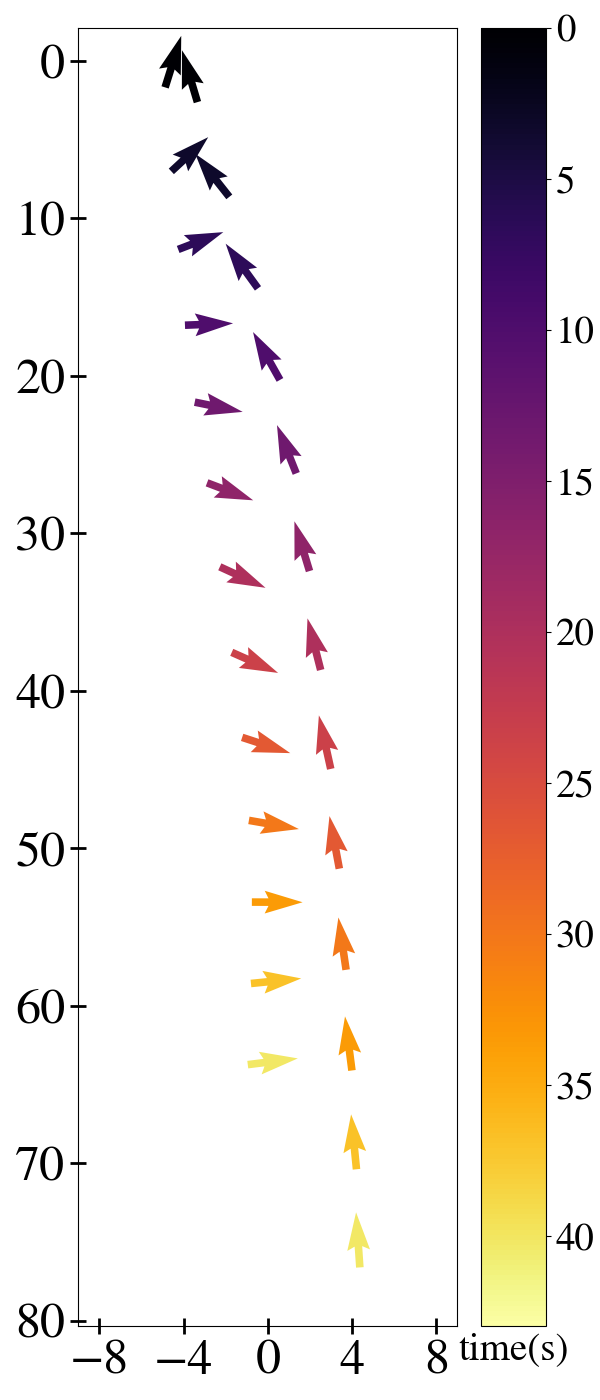

In [142]:
import os
from collections import OrderedDict
%run sedimentation.ipynb
dimer_particle_num = 4
triplet_particle_num = 6
mpl.rc('figure', figsize=(6, 14))
al = 2.79
st = 7.82
cu = 8.94
pl = 1.41

mapname = 'inferno'
cmap= cm.get_cmap(mapname)

al_std = n_particle(al,st,2)

cu_std = n_particle(st,cu,2)
print('Cu+St D:'+str(cu_std[1]))
cu_pld = n_particle(pl,cu,2)
print('Cu+Pl D:'+str(cu_pld[1]))
al_stt = n_particle(al,st,3)

cu_stt = n_particle(st,cu,3)
print('Cu+St T:'+str(cu_stt[1]))
cu_plt = n_particle(pl,cu,3)
print('Cu+Pl T:'+str(cu_plt[1]))

path1 = r'Z:\Kavinda Nissanka\Sedimentation\St+St\Dimers Binary\St+St 10000cst dimer 2.csv'
path2 = r'Z:\Kavinda Nissanka\Sedimentation\St+St\Triplet Binary Excel\St+St 10000cst triplet 1.csv'
path3 = r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Dimers\Raw Excel Files Binary\Cu+St 10000cst dimer 6 binary.csv'
path4 = r'Z:\Kavinda Nissanka\Sedimentation\Cu+St Pairs\Triplets\Raw Excel Files Binary\Cu+St 10000cst triplet 5 binary.csv'
path5 = r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Dimers\Raw Excel Files Binary\Cu+Pl 10000cst dimer 3 binary.csv'
path6 = r'Z:\Kavinda Nissanka\Sedimentation\Cu+Pl Pairs\Triplets\Raw Excel Files Binary\Cu+Pl 10000cst triplet 5 binary.csv'


data = pd.read_csv(path1)
threshold = 11
edges = edge_matrix(data,dimer_particle_num,threshold)
particles = particle_creator(edges)
#angle_plots(data,particles,'$\chi$ = '+str(cu_plt[1])[:5],cmap,1)
angle_plots(data,particles,'$\chi$ = 0',cmap,1)
plt.tight_layout()
plt.savefig(r'Z:\Kavinda Nissanka\Sedimentation\Figures\Angle Pair St+St dimer 2.svg')